9. Implement a simple autoencoder using Keras to compress and reconstruct images from the MNIST dataset.

In [1]:
# ----------------------------
# 1. Import required libraries
# ----------------------------
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.utils import plot_model

In [2]:
# ----------------------------
# 2. Load and preprocess data
# ----------------------------
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize pixel values (0-255 → 0-1)
x_train = x_train.astype("float32") / 255.
x_test = x_test.astype("float32") / 255.

# Flatten 28x28 images into 784-dimensional vectors
x_train = x_train.reshape((len(x_train), 28 * 28))
x_test = x_test.reshape((len(x_test), 28 * 28))


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# ----------------------------
# 3. Define Autoencoder Model
# ----------------------------
input_dim = 784   # 28x28 images flattened
encoding_dim = 32  # compressed representation (latent space)

# Encoder
input_img = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_img)

# Decoder
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Full Autoencoder model
autoencoder = Model(input_img, decoded)

# Encoder model (for feature extraction)
encoder = Model(input_img, encoded)

In [4]:
# ----------------------------
# 4. Compile the Model
# ----------------------------
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [5]:
# ----------------------------
# 5. Train the Model
# ----------------------------
autoencoder.fit(
    x_train, x_train,
    epochs=20,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test)
)

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.3879 - val_loss: 0.1840
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1753 - val_loss: 0.1509
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1472 - val_loss: 0.1340
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1320 - val_loss: 0.1224
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1215 - val_loss: 0.1145
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1140 - val_loss: 0.1087
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1088 - val_loss: 0.1044
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1047 - val_loss: 0.1011
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1012 - val_loss: 0.0983
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0989 - val_loss: 0.0963
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0969 - val_loss: 0.0948
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

In [6]:
# ----------------------------
# 6. Evaluate Reconstruction
# ----------------------------
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 726us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step


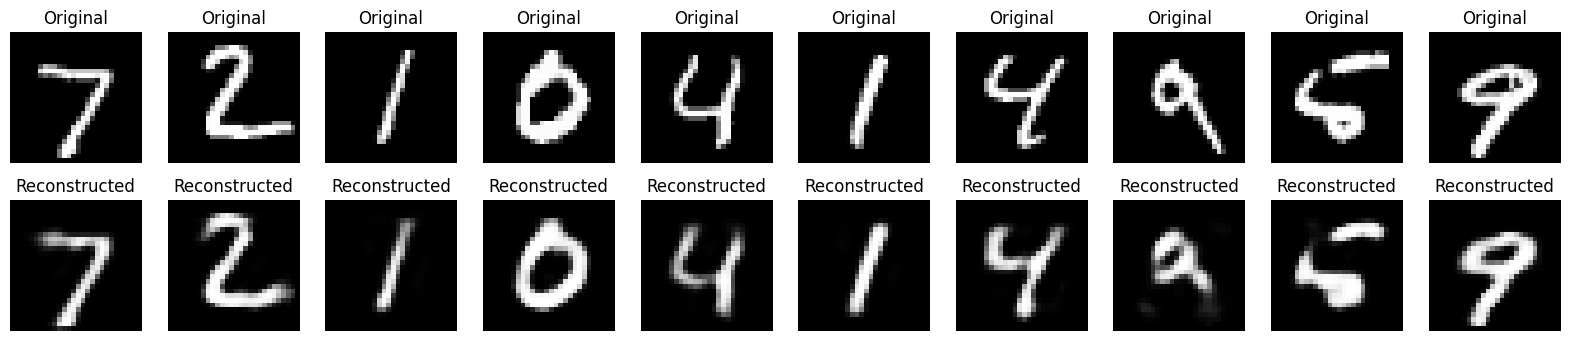

In [7]:
# ----------------------------
# 7. Display Original vs Reconstructed Images
# ----------------------------
n = 10  # number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    plt.title("Original")
    plt.axis("off")

    # Reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray")
    plt.title("Reconstructed")
    plt.axis("off")
plt.show()